# The Best NeighborHood in Pittsburgh

### Metric 

To find the Best NeighborHood to live in, we measured the quality of life of each neighborhood in the City of Pittsburgh by 4 metrics

1. Amount of Park and Recreational Space in each neighborhood

2. The Drunkenness of each neighborhood

3. The amount of city facilities in each neighborhood

4. The fire safety of each neighborhood

### 1. Park and Recreational Space - Dylan

#### The 10 neighborhoods in Pittsburgh with the most parks, building grounds,
#### open space, memorials, and traffic islands/medians

                 neighborhood  Count
22               East Liberty     12
13  Central Business District     10
5                   Beechview      8
57          South Side Slopes      7
50               Point Breeze      7
56           South Side Flats      6
30                  Hazelwood      6
54                   Sheraden      6
61        Squirrel Hill South      6
43           Mount Washington      6


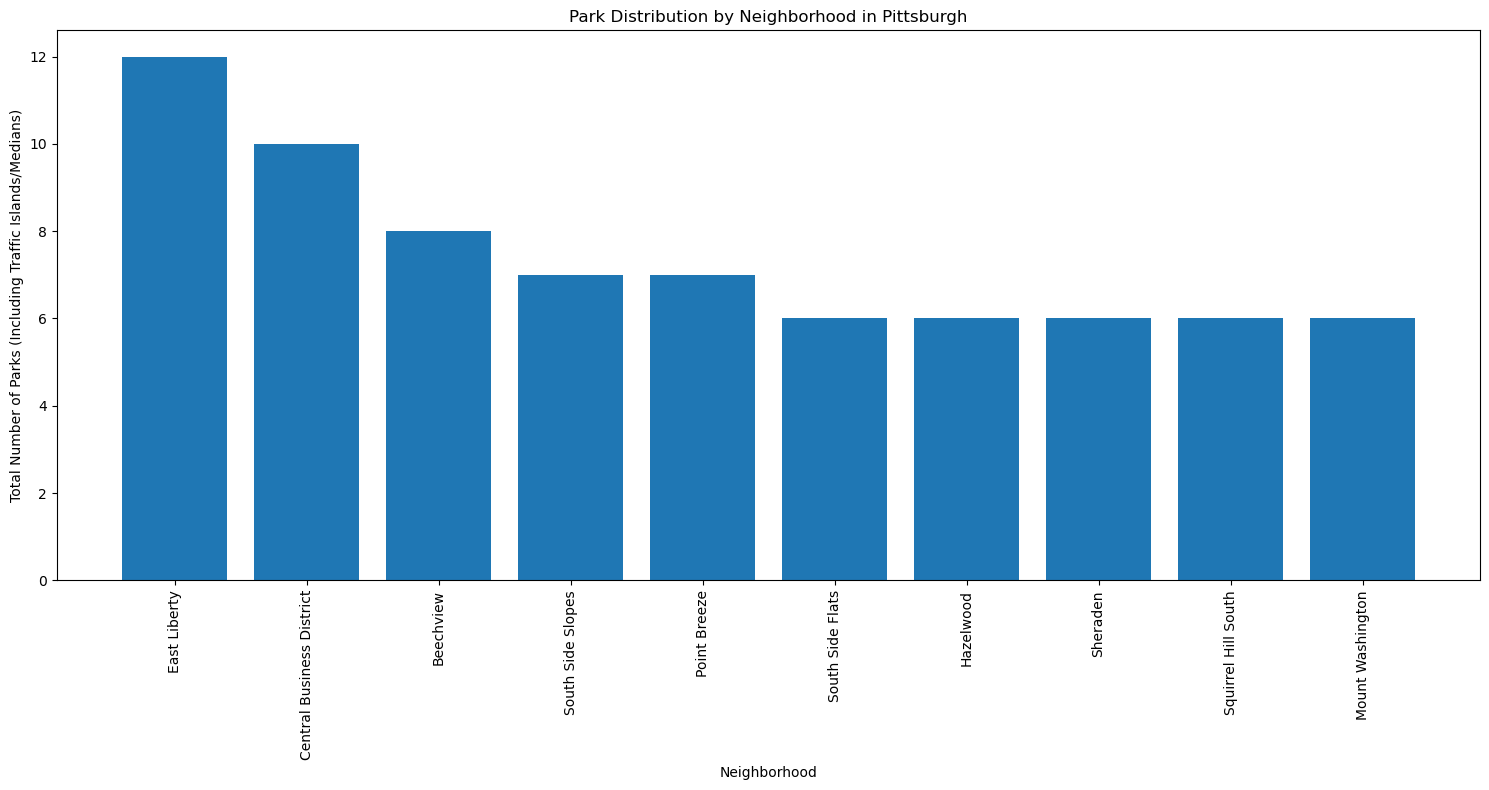

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


read = pd.read_csv("https://data.wprdc.org/datastore/dump/fa329e3d-89ff-4708-8ddf-81bfedcad11d")

grouped = read.groupby(['neighborhood', 'type']).size().reset_index(name='Count')

total_per_neighborhood = grouped.groupby('neighborhood')['Count'].sum().reset_index()

sorted_neighborhoods = total_per_neighborhood.sort_values(by='Count', ascending=False)

# Display the top results with Traffic Island/Median

first_10 = sorted_neighborhoods.head(10)

print(first_10)

# Plot
plt.figure(figsize=(15, 8))
plt.bar(first_10['neighborhood'], first_10['Count'])

# Add labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Total Number of Parks (Including Traffic Islands/Medians)')
plt.title('Park Distribution by Neighborhood in Pittsburgh')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### The 10 neighborhoods in Pittsburgh with the most parks, building grounds,
#### open space, memorials, but without traffic islands/medians

                 neighborhood  Count
56          South Side Slopes      7
5                   Beechview      7
53                   Sheraden      6
55           South Side Flats      6
43           Mount Washington      6
30                  Hazelwood      6
65                  Troy Hill      5
13  Central Business District      5
60        Squirrel Hill South      4
10           Brighton Heights      4


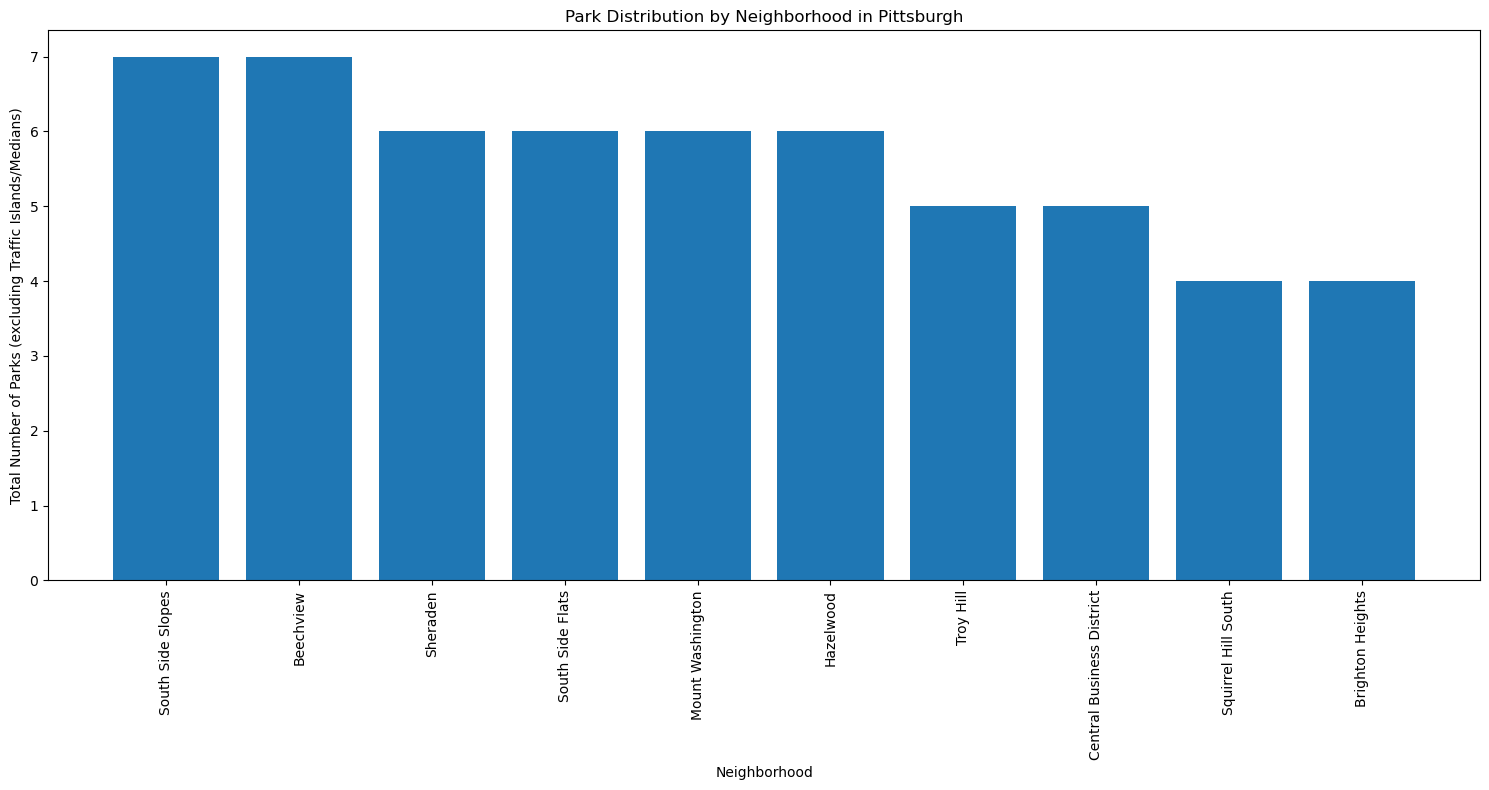

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

read = pd.read_csv("https://data.wprdc.org/datastore/dump/fa329e3d-89ff-4708-8ddf-81bfedcad11d")

# Filter out "Traffic Island/Median"
filtered = read[read['type'] != 'Traffic Island/Median']

# Count the number of each non Traffic Island/Median per neighborhood
park_counts = filtered.groupby(['neighborhood', 'type']).size().reset_index(name='Count')

total_for_filtered = park_counts.groupby('neighborhood')['Count'].sum().reset_index()

sorted_filtered = total_for_filtered.sort_values(by='Count', ascending=False)

# Display the top results without Traffic Island/Median
print(sorted_filtered.head(10))

first_10 = sorted_filtered.head(10)

# Plot
plt.figure(figsize=(15, 8))
plt.bar(first_10['neighborhood'], first_10['Count'])

plt.xlabel('Neighborhood')
plt.ylabel('Total Number of Parks (excluding Traffic Islands/Medians)')
plt.title('Park Distribution by Neighborhood in Pittsburgh')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 2. Drunkenness - Owen

In [3]:
import pandas as pd
crime = pd.read_csv('crimedataset.csv',low_memory=False)
drunkenness = crime[crime['NIBRS_Offense_Type'] == 'Drunkenness']
drunkenness_count = drunkenness['Neighborhood'].value_counts()

hammered_hood = drunkenness_count.idxmax()
hammered_count = drunkenness_count.max()

print(f"The drunkest neighborhood is {hammered_hood} with {hammered_count} people ready to party.")

The drunkest neighborhood is Central Business District with 39 people ready to party.


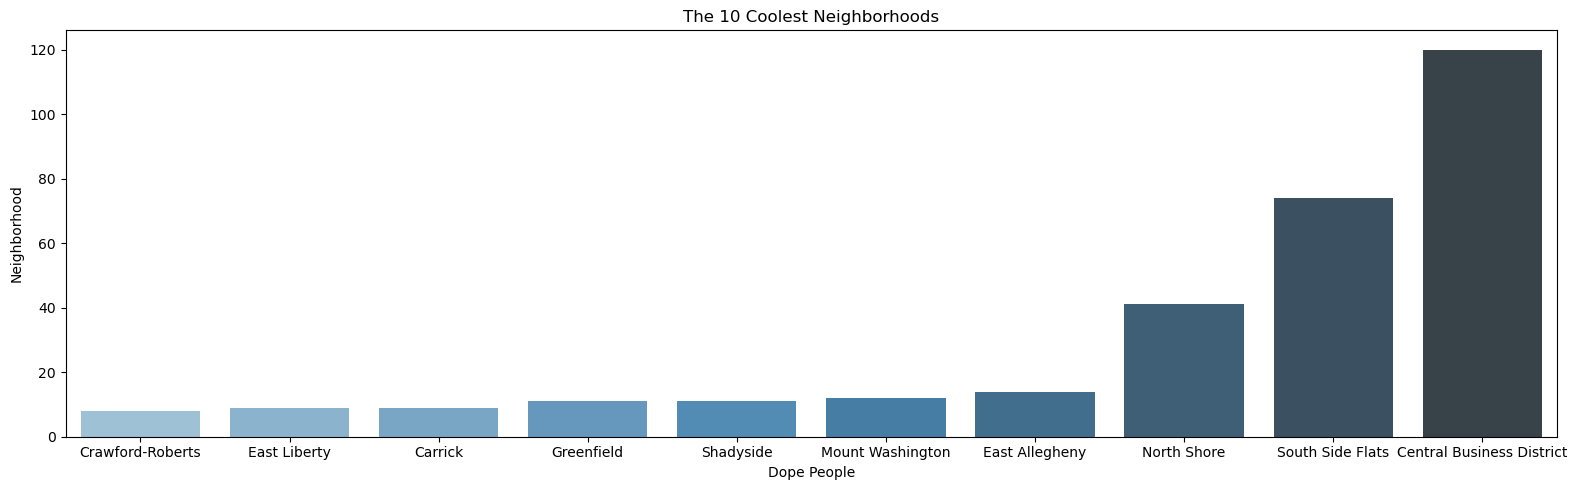

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

crime = pd.read_csv('crimedataset.csv',low_memory=False)
drunk = crime[crime['NIBRS_Offense_Type'].str.lower() == 'drunkenness']
bestMFs = (
    drunk['Neighborhood']
    .value_counts()
    .head(10)
    .sort_values(ascending=True)
)

plt.figure(figsize=(16, 5))
sns.barplot(x=bestMFs.index, y=bestMFs.values, palette='Blues_d')
plt.title('The 10 Coolest Neighborhoods')
plt.xlabel('Dope People')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()

### 3. City Facilities - Chris

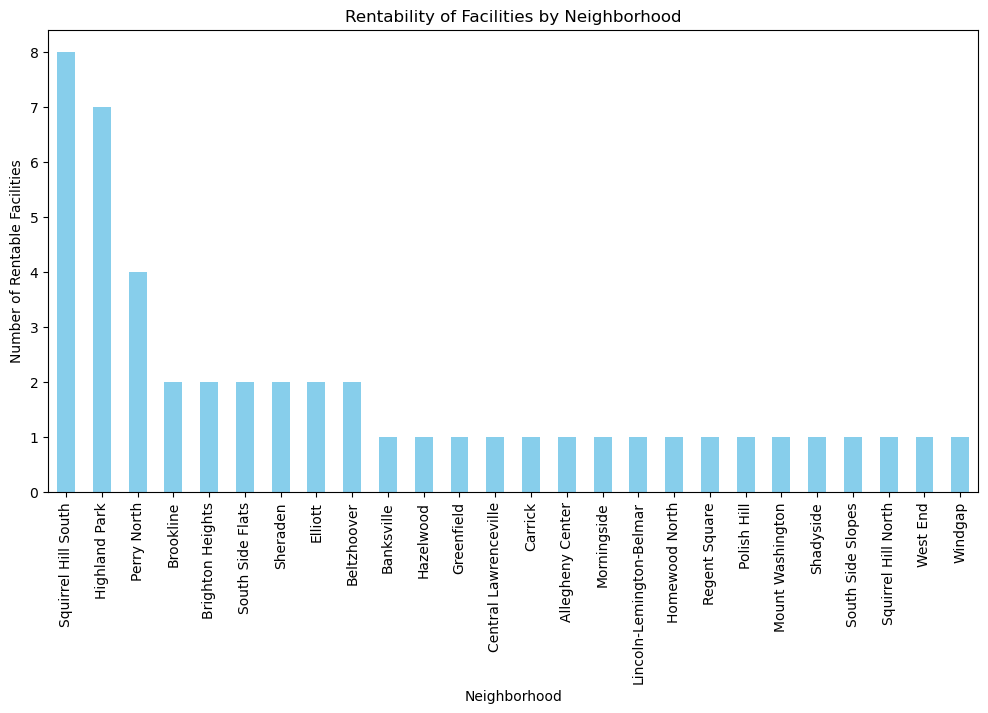

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
facility = "cityfacilities.csv" 
fac = pd.read_csv(facility)
rentable_counts = fac[fac["rentable"] == "t"].groupby("neighborhood").size()
rentable_counts = rentable_counts.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
rentable_counts.plot(kind="bar", color="skyblue")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Rentable Facilities")
plt.title("Rentability of Facilities by Neighborhood")
plt.xticks(rotation=90)  # Rotate labels for readability
import pandas as pdplt.show()

In [ ]:
import pandas as pd
rentable_facilities = pd["rentable"].sum()
print("Total number of rentable facilities:", rentable_facilities)

### 4. Fire Safety - Aiden

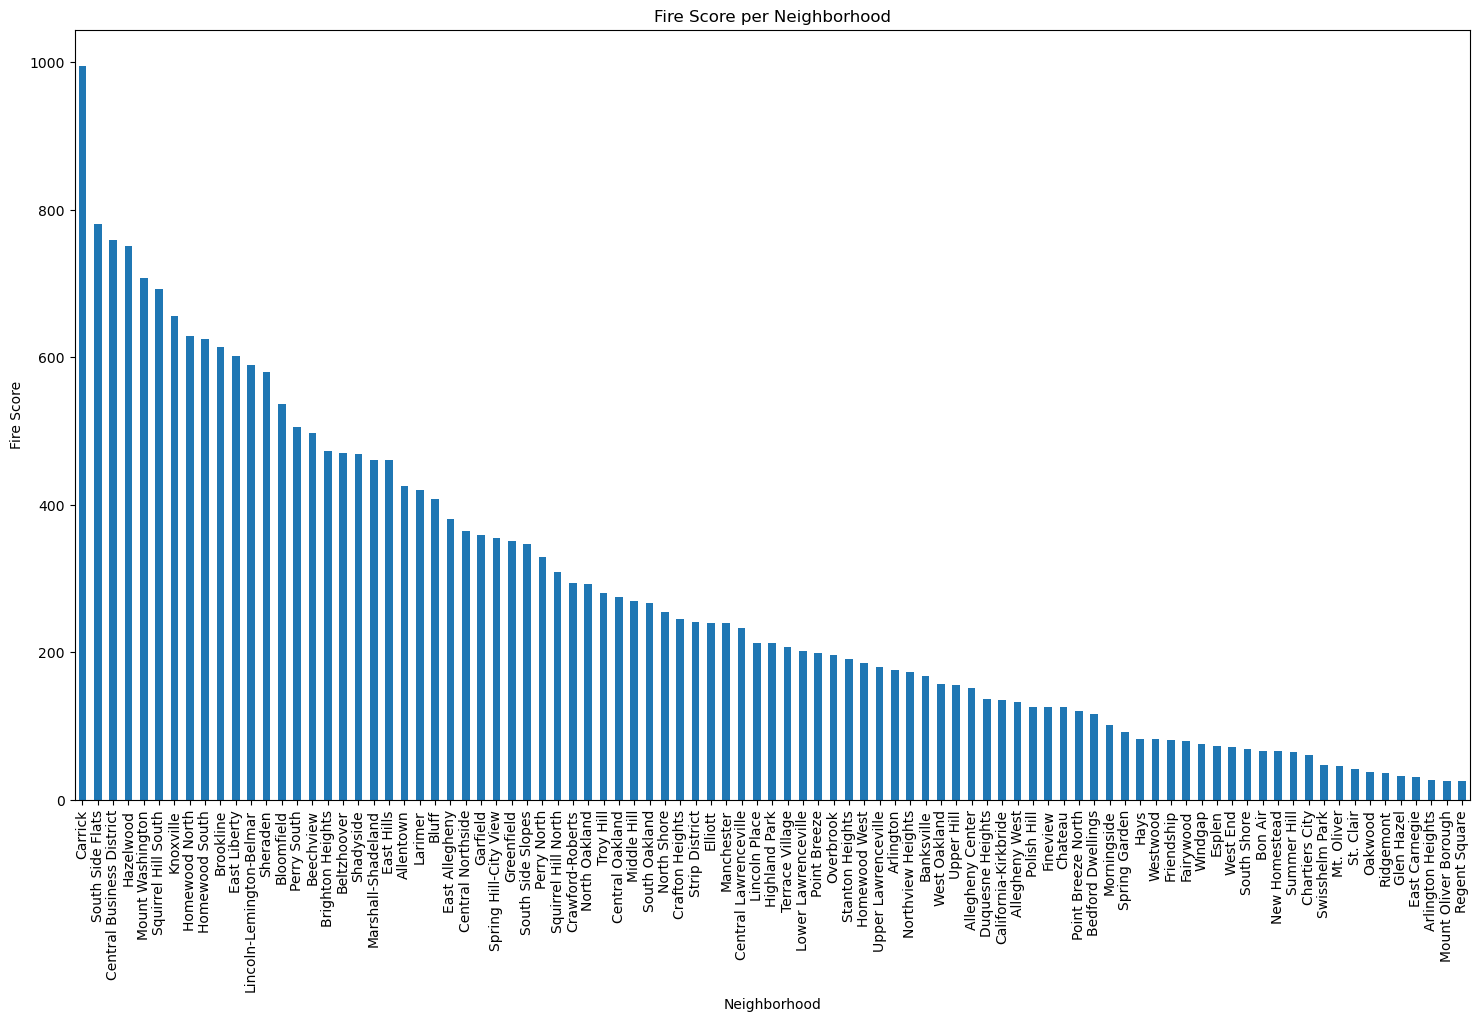


Best Neighborhood: Mount Oliver Borough

Worst Neighborhood: Carrick

Average Fire Score:
277.0769230769231

Median Fire Score:
212.0

Worst Neighborhoods:


neighborhood
Brookline                    614
Homewood South               624
Homewood North               629
Knoxville                    656
Squirrel Hill South          692
Mount Washington             707
Hazelwood                    750
Central Business District    759
South Side Flats             780
Carrick                      994
Name: Fire_Score, dtype: int64


Best Neighborhoods:


neighborhood
Regent Square           25
Mount Oliver Borough    25
Arlington Heights       27
East Carnegie           31
Glen Hazel              32
Ridgemont               36
Oakwood                 37
St. Clair               41
Mt. Oliver              46
Swisshelm Park          47
Name: Fire_Score, dtype: int64

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('fires.csv')

#Function used to determine the fire score of a given incident using key words
def fireScorer(row):
    for str in data['neighborhood']:
        if pd.Series(row).str.contains('contained|confined', case=False, na=False).any():
            return 1
        if pd.Series(row).str.contains('explosion|building fire', case=False, na=False).any():
            return 5
        else:
            return 3

#Add the fire scores to a new column in the dataframe
data['Fire_Score'] = data.apply(fireScorer, axis=1)

#Creating a barplot display
plt.figure(figsize=(18,10))
neighborhood_totals.sort_values(ascending=False).plot(kind='bar', figsize=(18,10))
plt.title('Fire Score per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Fire Score')
plt.show()

#To find the best and worst neighborhoods we group/sum fire scores by neighborhood and take the min and max
neighborhood_totals = data.groupby('neighborhood')['Fire_Score'].sum()
best_neighborhood = neighborhood_totals.idxmin()
worst_neighborhood = neighborhood_totals.idxmax()

print()
print("Best Neighborhood: " + best_neighborhood)
print()
print("Worst Neighborhood: " + worst_neighborhood)

avg = neighborhood_totals.mean()
print()
print("Average Fire Score:")
print(avg)

avg = neighborhood_totals.median()
print()
print("Median Fire Score:")
print(avg)

sorted_totals = neighborhood_totals.sort_values()

print()
print("Worst Neighborhoods:")
display(sorted_totals.tail(10))

print()
print("Best Neighborhoods:")
display(sorted_totals.head(10))

# Conclusions

### 1. Park and Recreational Space - Dylan
After looking over the results of the two different tests I did and seeing which one was the highest on both lists and had the least amount of change, I found the best neighborhood in Pittsburgh to be The South Side Slopes.  The reason why I split up the data to include and exclude traffic islands/medians is because what is consider can range from concrete slaps in the middle of the road to green patches with trees, with the average being closer to the former.  So to make the ranking more fair and accurate, I did two tests to find which neighborhoods had the most parks and rec space including and excluding traffic islands/medians, and find the neighborhood that had the least amount of change.
 
### 2. Drunkenness - Owen
Central Business District balls the hardest by a wide margin. Literally double what the losers in South Side Flats are doing, what the hell is wrong with them? Those idiots can't even get Absolutly trashed, be more like Central Business District. Thats why Central Business District is the best neighborhood.

### 3. City Facilities - Chris
According to my data visualization above, I would like to reach a conclusion that Squirrel Hill South is the best neighborhood so far with respect to the number of rentable facilities. Squirrel Hill South possesses a significant higher number of rentable facilities. As we can see from the code output above, there are only 48 rentable facilities in total around the city of Pittsburgh; within it, Squirrel Hill South occupies 8 of them, which is 16.7% of the total number. Squirrel Hill South is known as the most vital commercial area in Pittsburgh, for its condense presence of restaurants and shops in the neighborhood.
.

### 4. Fire Safety - Aidan
By analyzing the data, it is clear that the safest neighborhoods, as far as my fire score metric is concerned, are Rugent Square and Mont Oliver Borough. Both of these neighborhoods have a significantly lower fire score compared to both the median and mean. On the other hand, the worst neighborhood by a large margin is Carrick. This result is very interesting and pretty surprising, given that Carrick and Mont Oliver Borough are next to each other; however, it should be noted that Carrick is larger in land area than Mont Oliver Borough and Rugent Square.e.